In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import os

In [ ]:


# Define the directory where you want to save the dataset
dataset_dir = '/content/drive/MyDrive/food_101'

# Ensure the directory exists, create it if necessary
os.makedirs(dataset_dir, exist_ok=True)

# Change to the dataset directory
os.chdir(dataset_dir)

# Download the data
print("Downloading the data...")
!wget -P {dataset_dir} http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
print("Dataset downloaded!")

# Extract the data
print("Extracting data..")
!tar xzvf food-101.tar.gz > /dev/null 2>&1
print("Extraction done!")


--2024-06-20 06:00:45--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2024-06-20 06:00:46--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... ^C
Dataset downloaded!
Extracting data..
^C
Extraction done!


In [7]:
pip install tensorflow numpy pandas matplotlib tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

extract_path = '/content/drive/MyDrive/food_101/food-101'

# Assuming the images are extracted to 'images' folder within 'Food-101'
image_dir = os.path.join(extract_path, 'images')

# Function to load images and labels

In [3]:
from tqdm import tqdm
import cv2

In [4]:

def load_images_from_directory(directory, img_size=(64, 64)):
    images = []
    labels = []
    classes = os.listdir(directory)
    for class_name in tqdm(classes, desc="Loading images"):
        class_dir = os.path.join(directory, class_name)
        if os.path.isdir(class_dir):
            for img_file in os.listdir(class_dir):
                img_path = os.path.join(class_dir, img_file)
                try:
                    img = cv2.imread(img_path)
                    if img is not None:
                        img = cv2.resize(img, img_size)
                        images.append(img)
                        labels.append(class_name)
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load the data
X, y = load_images_from_directory(image_dir)

Loading images: 100%|██████████| 101/101 [1:18:33<00:00, 46.66s/it]


In [5]:
print(f"Number of images loaded: {len(X)}")


Number of images loaded: 101000


# Encode labels to integers

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [7]:
# split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [8]:
# Convert labels to one-hot encoding
from tensorflow.keras.utils import to_categorical
num_classes = len(np.unique(y_encoded))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

defining the model

In [9]:
def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [10]:
# Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
input_shape = X_train.shape[1:]  # (64, 64, 3)
model = create_cnn_model(input_shape, num_classes)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32)
model.save('food_recognition_model.task5')


Epoch 1/100
 463/2020 [=====>........................] - ETA: 6:30 - loss: 5.3022 - accuracy: 0.0104

In [ ]:
last_epoch_loss = history.history['loss'][-1]
last_epoch_accuracy = history.history['accuracy'][-1]

print(f"Last epoch loss: {last_epoch_loss:.4f}")
print(f"Last epoch accuracy: {last_epoch_accuracy:.4f}")


In [11]:
# Assuming we have a dictionary of calories per food item
calorie_data ={'apple_pie': 0,
 'baby_back_ribs': 1,
 'baklava': 2,
 'beef_carpaccio': 3,
 'beef_tartare': 4,
 'beet_salad': 5,
 'beignets': 6,
 'bibimbap': 7,
 'bread_pudding': 8,
 'breakfast_burrito': 9,
 'bruschetta': 10,
 'caesar_salad': 11,
 'cannoli': 12,
 'caprese_salad': 13,
 'carrot_cake': 14,
 'ceviche': 15,
 'cheese_plate': 16,
 'cheesecake': 17,
 'chicken_curry': 18,
 'chicken_quesadilla': 19,
 'chicken_wings': 20,
 'chocolate_cake': 21,
 'chocolate_mousse': 22,
 'churros': 23,
 'clam_chowder': 24,
 'club_sandwich': 25,
 'crab_cakes': 26,
 'creme_brulee': 27,
 'croque_madame': 28,
 'cup_cakes': 29,
 'deviled_eggs': 30,
 'donuts': 31,
 'dumplings': 32,
  'edamame': 33,
 'eggs_benedict': 34,
 'escargots': 35,
 'falafel': 36,
 'filet_mignon': 37,
 'fish_and_chips': 38,
 'foie_gras': 39,
 'french_fries': 40,
 'french_onion_soup': 41,
 'french_toast': 42,
 'fried_calamari': 43,
 'fried_rice': 44,
 'frozen_yogurt': 45,
 'garlic_bread': 46,
 'gnocchi': 47,
 'greek_salad': 48,
 'grilled_cheese_sandwich': 49,
 'grilled_salmon': 50,
 'guacamole': 51,
 'gyoza': 52,
 'hamburger': 53,
 'hot_and_sour_soup': 54,
 'hot_dog': 55,
 'huevos_rancheros': 56,
 'hummus': 57,
 'ice_cream': 58,
 'lasagna': 59,
 'lobster_bisque': 60,
 'lobster_roll_sandwich': 61,
 'macaroni_and_cheese': 62,
 'macarons': 63,
 'miso_soup': 64,
 'mussels': 65,
 'nachos': 66,
 'omelette': 67,
 'onion_rings': 68,
 'oysters': 69,
 'pad_thai': 70,
 'paella': 71,
 'pancakes': 72,
 'panna_cotta': 73,
 'peking_duck': 74,
 'pho': 75,
 'pizza': 76,
 'pork_chop': 77,
 'poutine': 78,
 'prime_rib': 79,
 'pulled_pork_sandwich': 80,
 'ramen': 81,
 'ravioli': 82,
 'red_velvet_cake': 83,
 'risotto': 84,
 'samosa': 85,
 'sashimi': 86,
 'scallops': 87,
 'seaweed_salad': 88,
 'shrimp_and_grits': 89,
 'spaghetti_bolognese': 90,
 'spaghetti_carbonara': 91,
 'spring_rolls': 92,
 'steak': 93,
 'strawberry_shortcake': 94,
 'sushi': 95,
 'tacos': 96,
 'takoyaki': 97,
 'tiramisu': 98,
 'tuna_tartare': 99,
 'waffles': 100}


In [12]:
# Map labels to calories
y_calories = np.array([calorie_data[label] for label in y])

# Split the data for calorie prediction
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X, y_calories, test_size=0.2, random_state=42)

In [13]:
# regression model for calorie estimation
def create_regression_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
    return model

In [14]:
# Create the calorie estimation model
calorie_model = create_regression_model(input_shape)

# Train the model
calorie_model.fit(X_train_cal, y_train_cal, epochs=15, validation_split=0.2, batch_size=32)
# Save the trained model
calorie_model.save('calorie_model.task5')


# Evaluate the model
mse, mae = calorie_model.evaluate(X_test_cal, y_test_cal)
print(f'Test MAE for calorie estimation: {mae}')

Epoch 1/15
2020/2020 [==============================] - 538s 266ms/step - loss: 2137.5095 - mae: 28.6993 - val_loss: 879.2755 - val_mae: 25.2536
Epoch 2/15
2020/2020 [==============================] - 515s 255ms/step - loss: 1067.5028 - mae: 27.1581 - val_loss: 920.3135 - val_mae: 25.7035
Epoch 3/15
2020/2020 [==============================] - 511s 253ms/step - loss: 1047.7612 - mae: 26.8930 - val_loss: 883.1783 - val_mae: 25.1975
Epoch 4/15
2020/2020 [==============================] - 493s 244ms/step - loss: 1023.7082 - mae: 26.5670 - val_loss: 893.3580 - val_mae: 25.3492
Epoch 5/15
2020/2020 [==============================] - 511s 253ms/step - loss: 1007.3010 - mae: 26.3639 - val_loss: 905.7197 - val_mae: 25.3884
Epoch 6/15
2020/2020 [==============================] - 522s 258ms/step - loss: 993.8100 - mae: 26.2173 - val_loss: 871.9583 - val_mae: 25.2176
Epoch 7/15
2020/2020 [==============================] - 497s 246ms/step - loss: 966.7722 - mae: 25.8583 - val_loss: 907.4570 - val_

In [25]:
from sklearn.metrics import confusion_matrix

# Predictions on test data
y_pred_cal = calorie_model.predict(X_test_cal)
print(y_pred_cal)
print(y_test_cal)
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_cal, y_pred_cal)
mse = mean_squared_error(y_test_cal, y_pred_cal)
print(f"MAE: {mae:.2f}, MSE: {mse:.2f}")


632/632 [==============================] - 41s 65ms/step
[[55.207855]
 [70.321976]
 [28.216515]
 ...
 [46.66958 ]
 [57.847107]
 [55.663723]]
[ 47  75 100 ...  21  24   3]
MAE: 25.51, MSE: 924.77


Visualize Predictions

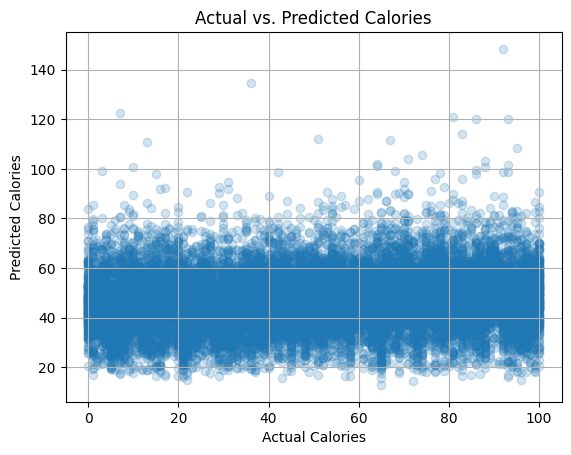

In [27]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(y_test_cal, y_pred_cal, alpha=0.2)
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.title("Actual vs. Predicted Calories")
plt.grid(True)
plt.show()
